<a href="https://colab.research.google.com/github/mbuguajackson/Data-Science-with-Python/blob/main/test_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# id_classifier.py
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os

In [2]:
from pickle import TRUE
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_dir = "/content/drive/My Drive/Colab Notebooks/ID Recognition"
val_dir = "/content/drive/My Drive/Colab Notebooks/ID Recognition"


In [4]:
# Data generator
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    class_mode='binary'
)

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

# Add classifier head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(train_gen, validation_data=val_gen, epochs=5)

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5000 - loss: 0.7268

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.7268 - val_accuracy: 0.5000 - val_loss: 0.8662
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.8662 - val_accuracy: 0.5000 - val_loss: 0.6989
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.8018
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8018 - val_accuracy: 0.5000 - val_loss: 0.7623
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.7623 - val_accuracy: 0.5000 - val_loss: 0.7015


Saving Screenshot 2024-05-07 174153.png to Screenshot 2024-05-07 174153.png


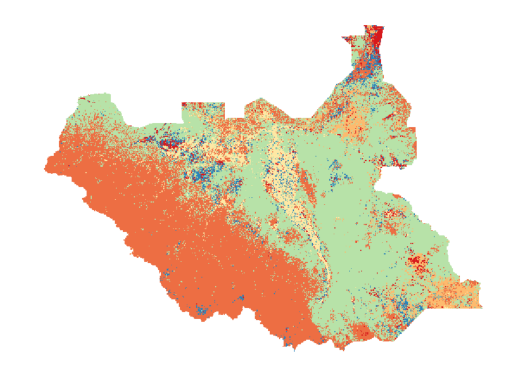

In [24]:
from google.colab import files
uploaded = files.upload()

from PIL import Image
import matplotlib.pyplot as plt

# Get the uploaded filename
filename = next(iter(uploaded))  # gets the first (and likely only) uploaded file

# Load and display the image
image = Image.open(filename)
plt.imshow(image)
plt.axis('off')
plt.show()


In [25]:
import numpy as np

# Ensure image is RGB
img = image.convert("RGB").resize((224, 224))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Prediction: ID")
else:
    print("Prediction: Not ID")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Prediction: ID
